# Phase 3 Project

### 1.0 Business Understanding

Seriatel Telecom company wishes to predict customer churn, specifically identify which customers are likely to stop using their services.
 With this, Syriatel will be able to take measures to retain customers that are of high risk to leave and know how to handle them and as a result reducing revenue loss. By building a classification model, our company will be able to come up with strategies to deal with the churning.

### 1.1 Problem statement

Is our model able to predict which customers are at high risk of churn and can we develop strategies to avoid the churning

### 1.2 Objectives

* Reducing the rate of churn

* Try and retain Customers

* Customer satisfaction

### 1.3 Stakeholders

- Marketing team

- Finance and 

- Customer suport

In [67]:
# Importing the necessary liblaries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, r2_score, confusion_matrix, classification_report
import category_encoders as CTE
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Reading and Understanding the data

In [68]:
# reading the syriatel data and visualizing the first five columns
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

* The data set has 20 columns 
and 3332 rows
including 1 boolean, 8 float64, 8 int64 and 4 string data types

In [70]:
missing_values = df.isnull().sum()
missing_values

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

* Our data set has no missing values

In [71]:
numeric = df.describe().T
object = df.describe(include= 'object').T
boolean = df.describe(include = 'bool').T

print(numeric)
print(object)
print(boolean)



                         count        mean        std     min     25%     50%  \
account length          3333.0  101.064806  39.822106    1.00   74.00  101.00   
area code               3333.0  437.182418  42.371290  408.00  408.00  415.00   
number vmail messages   3333.0    8.099010  13.688365    0.00    0.00    0.00   
total day minutes       3333.0  179.775098  54.467389    0.00  143.70  179.40   
total day calls         3333.0  100.435644  20.069084    0.00   87.00  101.00   
total day charge        3333.0   30.562307   9.259435    0.00   24.43   30.50   
total eve minutes       3333.0  200.980348  50.713844    0.00  166.60  201.40   
total eve calls         3333.0  100.114311  19.922625    0.00   87.00  100.00   
total eve charge        3333.0   17.083540   4.310668    0.00   14.16   17.12   
total night minutes     3333.0  200.872037  50.573847   23.20  167.00  201.20   
total night calls       3333.0  100.107711  19.568609   33.00   87.00  100.00   
total night charge      3333

* column churn has 2 Unique values **YES** and **NO** which is an indication of a categorical column

In [72]:
# droping unnecesary columns for our analysis
columns_to_drop = ['account length', 'area code', 'phone number']

for column in columns_to_drop:
    df = df.drop(column, axis=1)


print(df)

     state international plan voice mail plan  number vmail messages  \
0       KS                 no             yes                     25   
1       OH                 no             yes                     26   
2       NJ                 no              no                      0   
3       OH                yes              no                      0   
4       OK                yes              no                      0   
...    ...                ...             ...                    ...   
3328    AZ                 no             yes                     36   
3329    WV                 no              no                      0   
3330    RI                 no              no                      0   
3331    CT                yes              no                      0   
3332    TN                 no             yes                     25   

      total day minutes  total day calls  total day charge  total eve minutes  \
0                 265.1              110             4

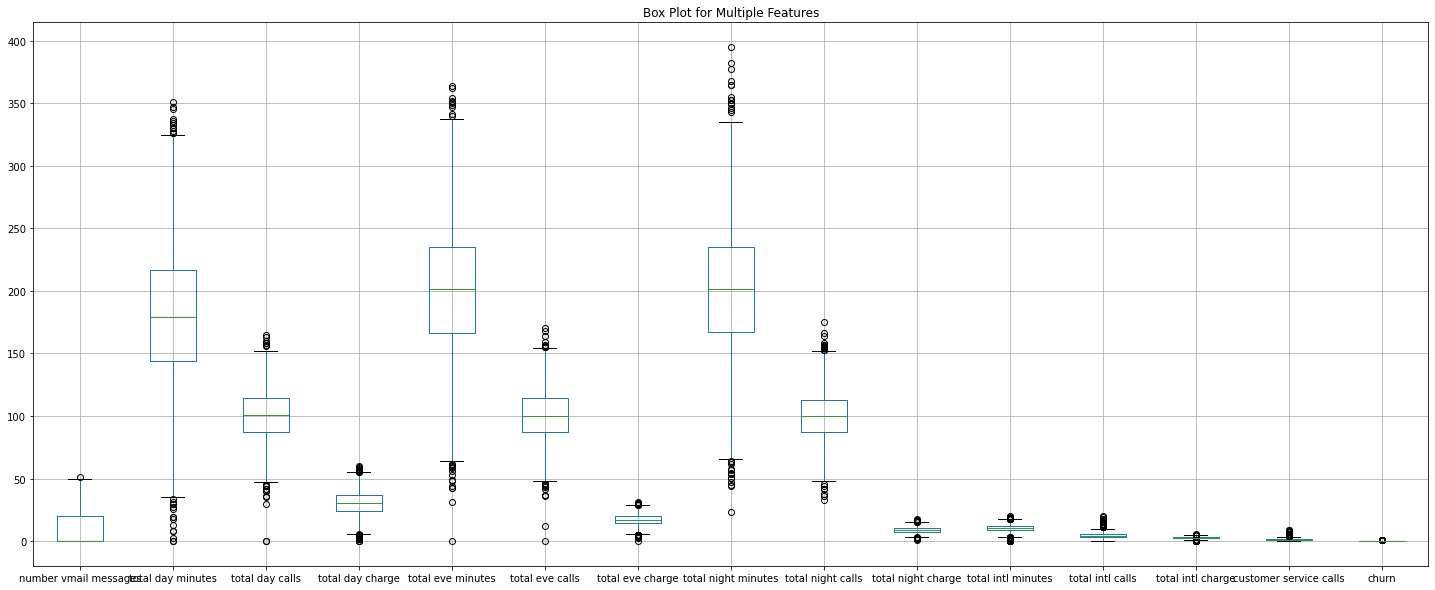

In [73]:
# checking for outliars
df.boxplot(figsize=(25, 10))
plt.title('Box Plot for Multiple Features')
plt.show()

Our data set contains outliers in columns:

- ***Total day minutes***

- ***Total day calls***

- ***Total eve calls***

- ***Total night minutes***

- ***Total night calls***

In [74]:
# handling outliers in the data
columns_to_check = ['total day minutes', 'total day calls', 'total eve minutes', 'total eve calls', 
                    'total night minutes', 'total night calls']

def handle_outliers(df, columns, method='remove'):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if method == 'remove':
           
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
        elif method == 'cap':
          
            df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
        
        elif method == 'impute':
            
            median_value = df[column].median()
            df[column] = df[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
    
    return df

data_clean = handle_outliers(df, columns_to_check, method='remove')


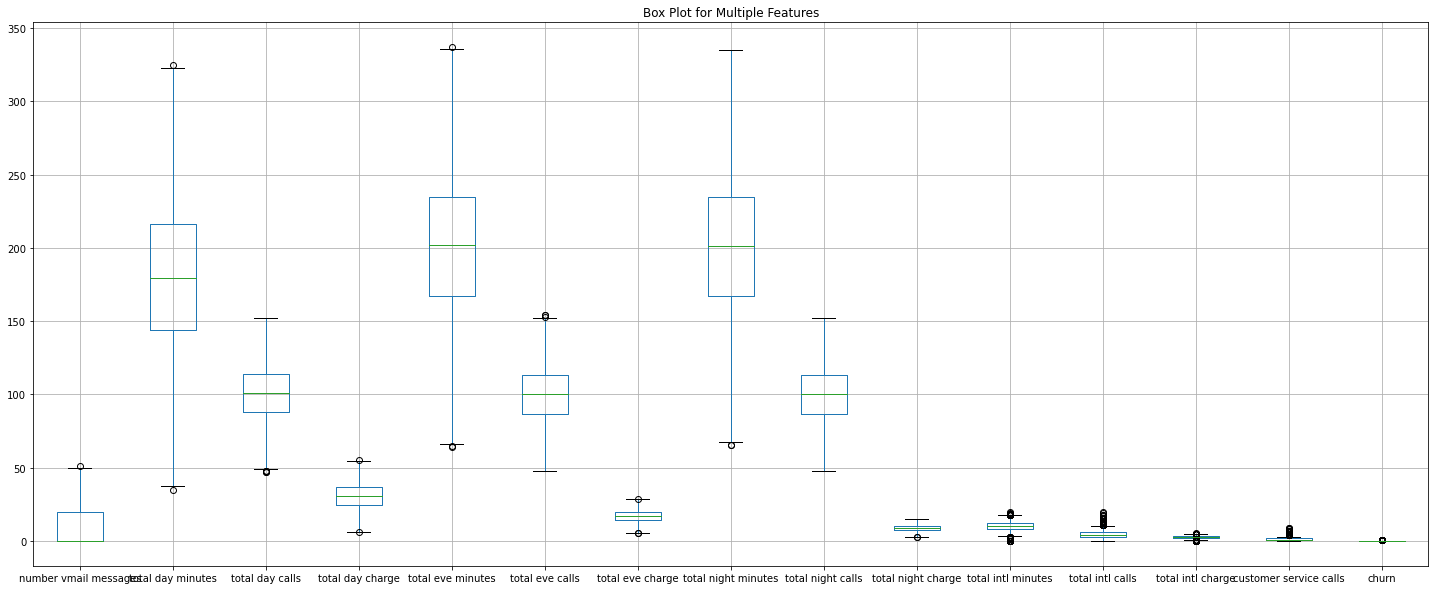

In [75]:
# checking if the outliers were handled properly
data_clean.boxplot(figsize=(25, 10))
plt.title('Box Plot for Multiple Features')
plt.show()

### Data Analysis

#### Univariate Analysis

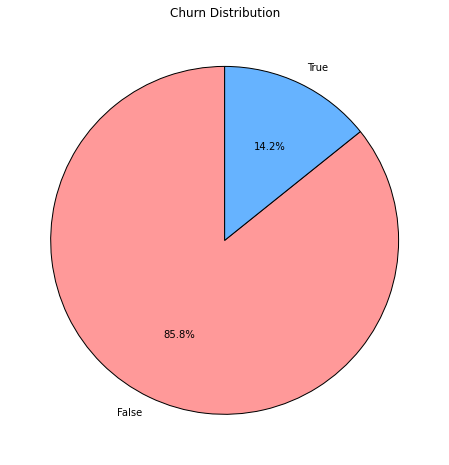

In [77]:
churn_counts = data_clean['churn'].value_counts()

# Plot the pie chart
plt.figure(figsize=(7, 7))  # Optional: Set figure size
churn_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'], 
                      wedgeprops={'edgecolor': 'black'}, figsize=(8,8))
plt.title('Churn Distribution')
plt.ylabel('')  # Optional: Hide the y-axis label
plt.show()

* The plot above shows that 14.2% of the customers are likely to leave the company while 85.8% are likely to still stay in the company





In [86]:
columns_to_check = ['international plan', 'voice mail plan', 'total intl calls', 'customer service calls']

# Loop through each column and print the value counts
for column in columns_to_check:
    print(f"Value counts for '{column}':")
    print(data_clean[column].value_counts())
    print("\n" + "-"*50 + "\n")


Value counts for 'international plan':
no     2885
yes     309
Name: international plan, dtype: int64

--------------------------------------------------

Value counts for 'voice mail plan':
no     2309
yes     885
Name: voice mail plan, dtype: int64

--------------------------------------------------

Value counts for 'total intl calls':
3     638
4     599
2     475
5     453
6     322
7     204
1     148
8     110
9     102
10     49
11     27
0      18
13     14
12     14
15      7
14      6
18      3
16      2
19      1
17      1
20      1
Name: total intl calls, dtype: int64

--------------------------------------------------

Value counts for 'customer service calls':
1    1125
2     730
0     670
3     412
4     161
5      61
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64

--------------------------------------------------



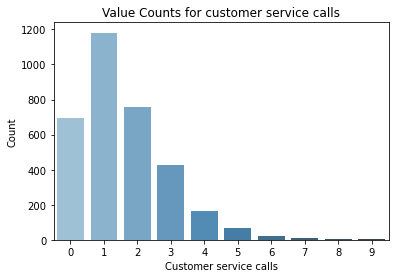

In [83]:
customer_service_calls_counts =df['customer service calls'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(6, 4))  #Set figure size
sns.barplot(x=customer_service_calls_counts.index, y=customer_service_calls_counts.values, palette="Blues_d")

plt.xlabel('Customer service calls')
plt.ylabel('Count')
plt.title('Value Counts for customer service calls')
plt.show()

* 1 call is the most frequent in customer service followed by 2 calls then 0 calls and 3 calls, while the least calls made are 9

#### Bivariate Analysis

sns.countplot(x='international plan', hue='voice mail plan', data_clen=data)
plt.title('Relationship Between International Plan and Voice Mail Plan')
plt.show()

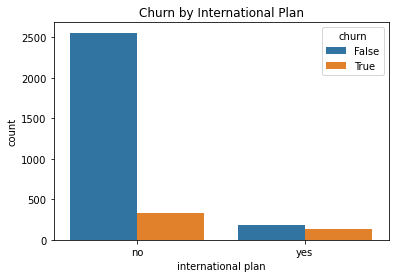

In [88]:
sns.countplot(x='international plan', hue='churn', data=data_clean)
plt.title('Churn by International Plan')
plt.show()

* The figure above shows The distribution of Churn to customers with International plan and those with no International plan.

* Customers with No international plan are less likely to leave the company while those with international plan seem to have equal measure to leaving and not leaving

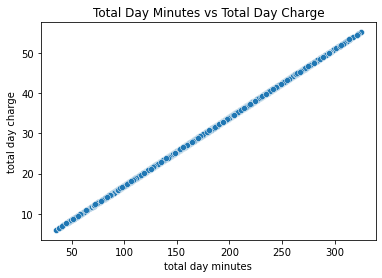

In [89]:
sns.scatterplot(x='total day minutes', y='total day charge', data=data_clean)
plt.title('Total Day Minutes vs Total Day Charge')
plt.show()

* Total day charge have a perfect linear relationship with total day minutes

* As Minutes increase, so does the charge

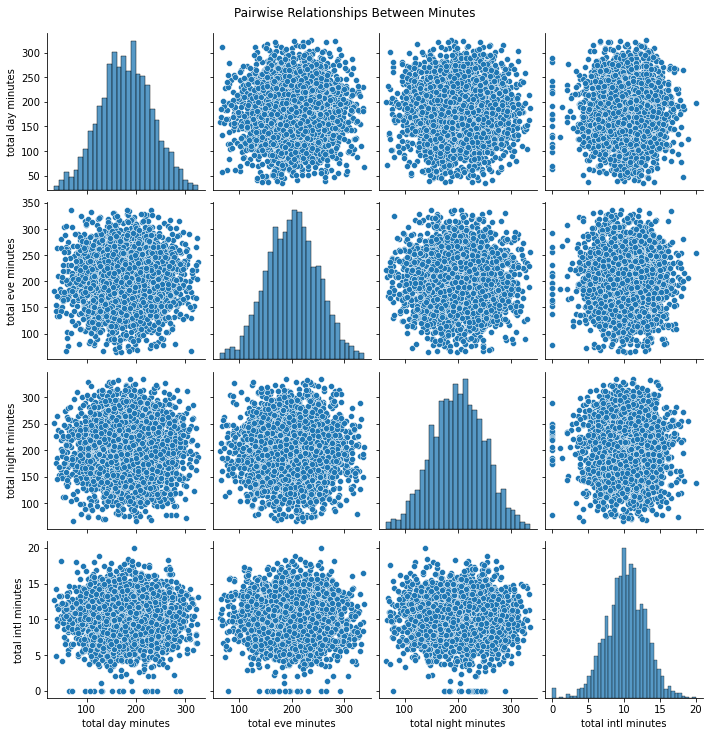

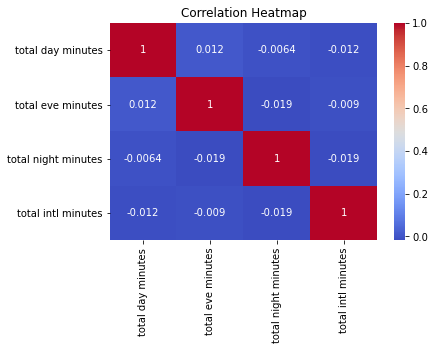

In [90]:
# Pair Plot to visualize pairwise relationships
sns.pairplot(data_clean[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']])
plt.suptitle('Pairwise Relationships Between Minutes', y=1.02)
plt.show()

# Correlation Heatmap
correlation_matrix = data_clean[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#### Multivariate analysis

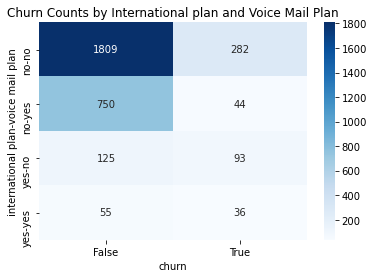

In [96]:
# Create a crosstab to show the count of combinations
ct = pd.crosstab([data_clean['international plan'], data_clean['voice mail plan']], data_clean['churn'])
sns.heatmap(ct, annot=True, cmap='Blues', fmt='d')
plt.title('Churn Counts by International plan and Voice Mail Plan')
plt.show()


* Customers with no International plan and No voice mail plan are less likely to leave

* Customers with no international plan and have a voice mail plan are more likely to leave the company soon

